In [14]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

fig = px.histogram(df, 
                      x='model_year', 
                      color='condition', 
                      barmode='overlay', 
                      title='Histogram of Vehicle Condition by Model Year',
                      labels={'model_year': 'Model Year', 'condition': 'Vehicle Condition'},
                      histnorm='probability density')

fig.update_layout(xaxis_title='Model Year',
                     yaxis_title='Density',
                     barmode='overlay',
                     hovermode='x unified')
fig.show()



Matplotlib is building the font cache; this may take a moment.


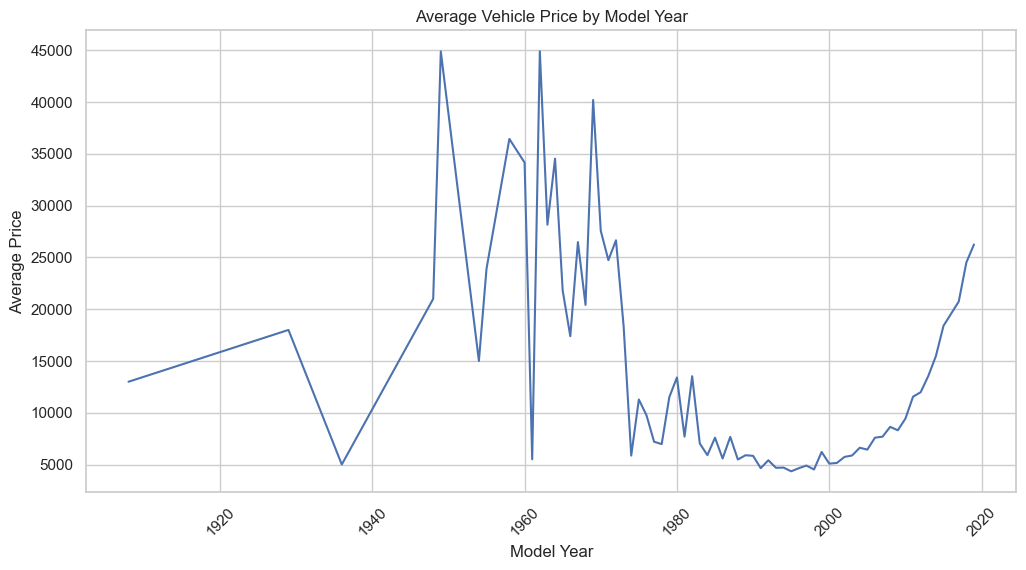

In [15]:
sns.set(style='whitegrid')

   # Create a line plot for average price per model year
avg_price_per_year = df.groupby('model_year')['price'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_per_year, x='model_year', y='price')
plt.title('Average Vehicle Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()